In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = ("Z:/Methane_final.csv")
methane = pd.read_csv(path)

print("Общее количество наблюдений:")
display(methane.shape[0])

Общее количество наблюдений:


1548

In [7]:
top_10_countries_max = methane.sort_values("emissions", ascending = False).head(10)
print("Страны с максимальными выбросами метана:")
print(top_10_countries_max["country"])

continents_max = top_10_countries_max["region"].unique()
print("\nКонтиненты, макс выбросы")
print(continents_max)

top_10_countries_min = methane.sort_values("emissions").head(10)
print("Страны с минимальными выбросами метана:")
print(top_10_countries_min["country"])

continents_min = top_10_countries_min["region"].unique()
print("\nКонтиненты, мин выбросы")
print(continents_min)



Страны с максимальными выбросами метана:
1526            World
1545            World
1547            World
1544            World
1540            World
478             China
460             China
481             India
1489           Russia
1406    United States
Name: country, dtype: object

Континенты, макс выбросы
['World' 'Asia Pacific' 'Russia & Caspian' 'North America']
Страны с минимальными выбросами метана:
1416          Other
978     Netherlands
973     Netherlands
246         Morocco
1417          Other
974     Netherlands
1106       Slovenia
979     Netherlands
264      Mozambique
283           Niger
Name: country, dtype: object

Континенты, мин выбросы
['Other' 'Europe' 'Africa']


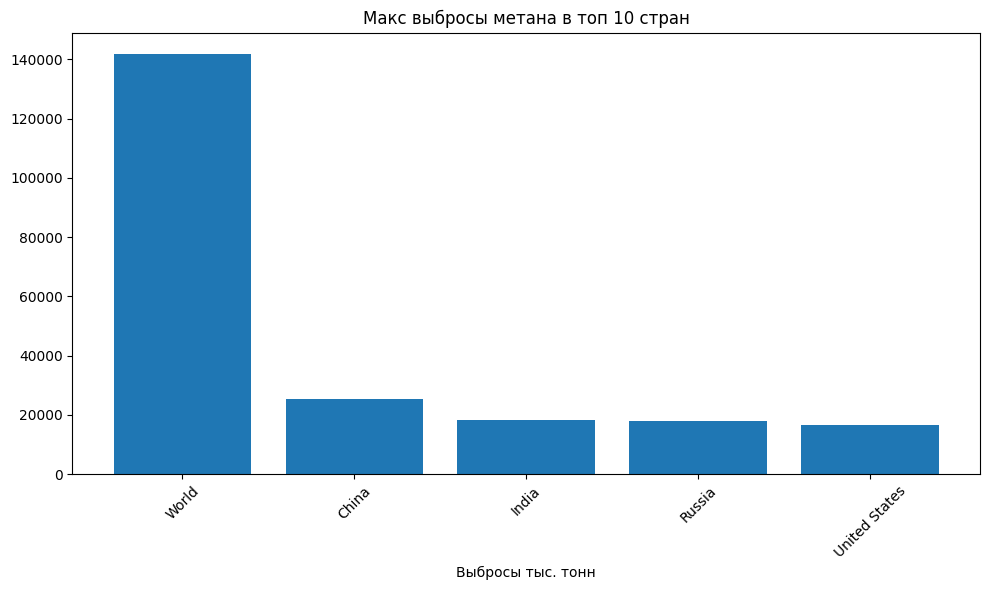

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_max["country"], top_10_countries_max["emissions"])
plt.xlabel("Страна")
plt.xlabel("Выбросы тыс. тонн")
plt.title("Макс выбросы метана в топ 10 стран")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

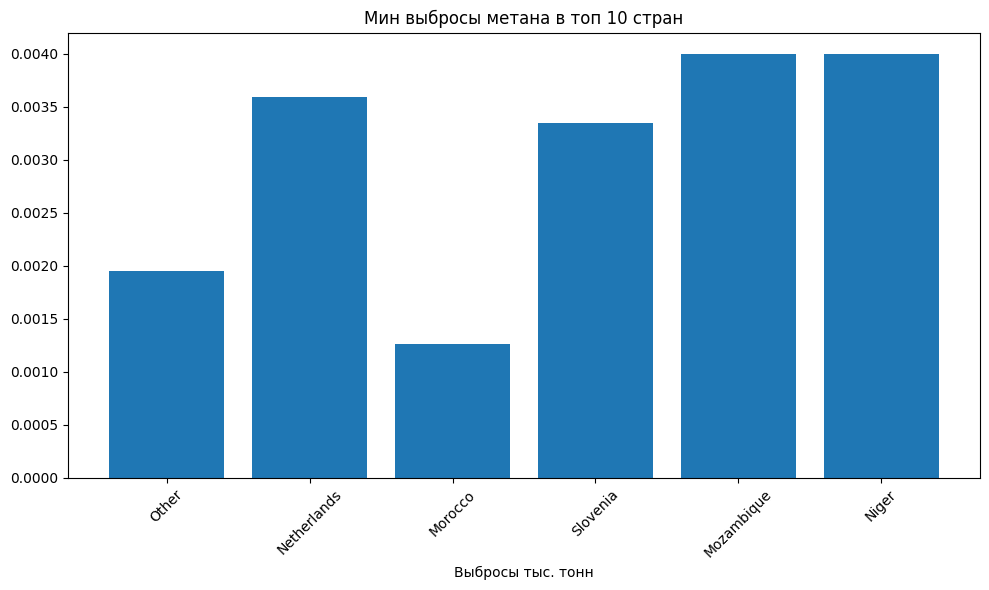

In [11]:
top_10_countries_min_sorted = top_10_countries_min.sort_values("emissions")
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries_min["country"], top_10_countries_min["emissions"])
plt.xlabel("Страна")
plt.xlabel("Выбросы тыс. тонн")
plt.title("Мин выбросы метана в топ 10 стран")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
top_reasons = methane["reason"].value_counts().head()
print("Наиболее часто встречающиеся причины выбросов")
print(top_reasons)

Наиболее часто встречающиеся причины выбросов
reason
All         746
Fugitive    342
Vented      342
Flared      118
Name: count, dtype: int64


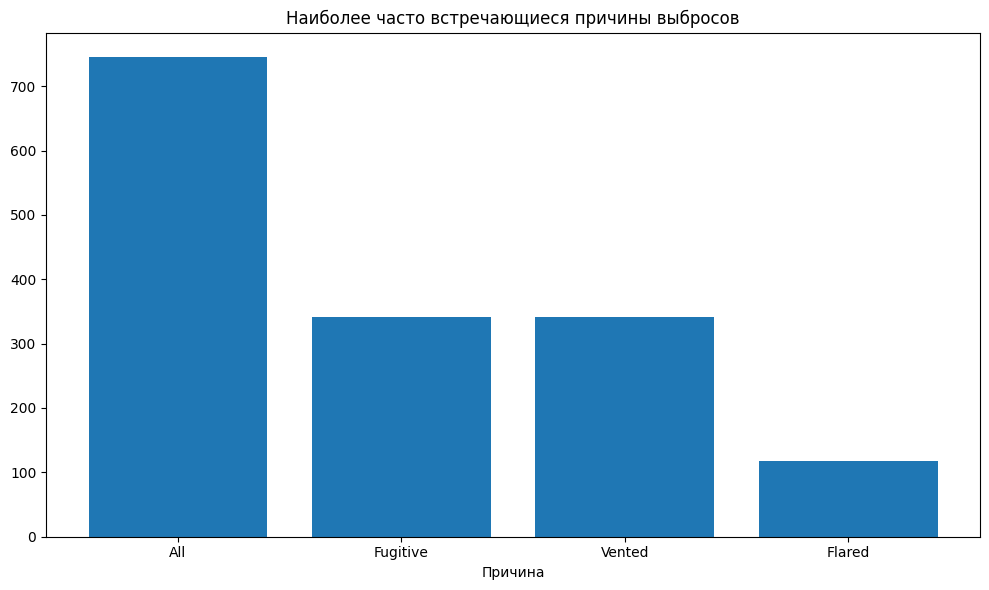

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(top_reasons.index,  top_reasons.values)
plt.xlabel("Количество случаев")
plt.xlabel("Причина")
plt.title("Наиболее часто встречающиеся причины выбросов")
plt.tight_layout()
plt.show()


In [14]:
grouped_max = top_10_countries_max.groupby("baseYear")["emissions"].sum()
print("Группировка п1:")
print(grouped_max)

grouped_min = top_10_countries_min.groupby("baseYear")["emissions"].sum()
print("Группировка п2:")
print(grouped_min)

Группировка п1:
baseYear
2019-2021    249572.908203
2022         249808.921875
Name: emissions, dtype: float64
Группировка п2:
baseYear
2022    0.024037
Name: emissions, dtype: float64


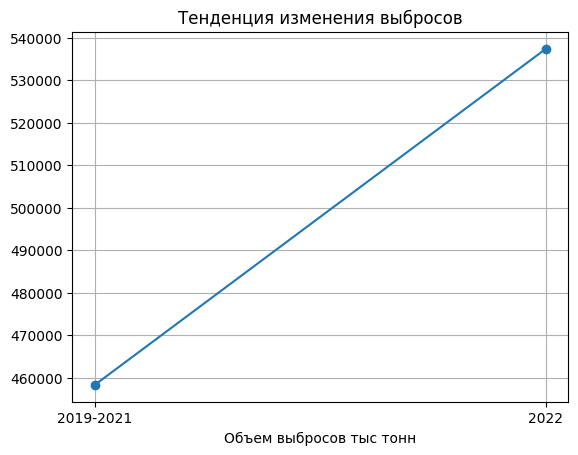

In [15]:
grouped = methane.groupby("baseYear")["emissions"].sum()

plt.plot(grouped.index,  grouped.values, marker = 'o')
plt.xlabel("Базовый год")
plt.xlabel("Объем выбросов тыс тонн")
plt.title("Тенденция изменения выбросов")
plt.grid(True)
plt.show()

In [18]:
top_sectors = methane["type"].value_counts().head(1)
bottom_sectors = methane["type"].value_counts().tail(1)
print("Наиболее встречающийся сектор:")
print(top_sectors)
print("Наименее встречающийся сектор:")
print(bottom_sectors)

grouped_sectors = methane.groupby("type")["emissions"].sum()
print("\nОбъем выбросов по секторам:")
print(grouped_sectors)

Наиболее встречающийся сектор:
type
Energy    1233
Name: count, dtype: int64
Наименее встречающийся сектор:
type
Waste    105
Name: count, dtype: int64

Объем выбросов по секторам:
type
Agriculture    292758.868769
Energy         537396.311526
Other           19766.646886
Waste          145838.417946
Name: emissions, dtype: float64


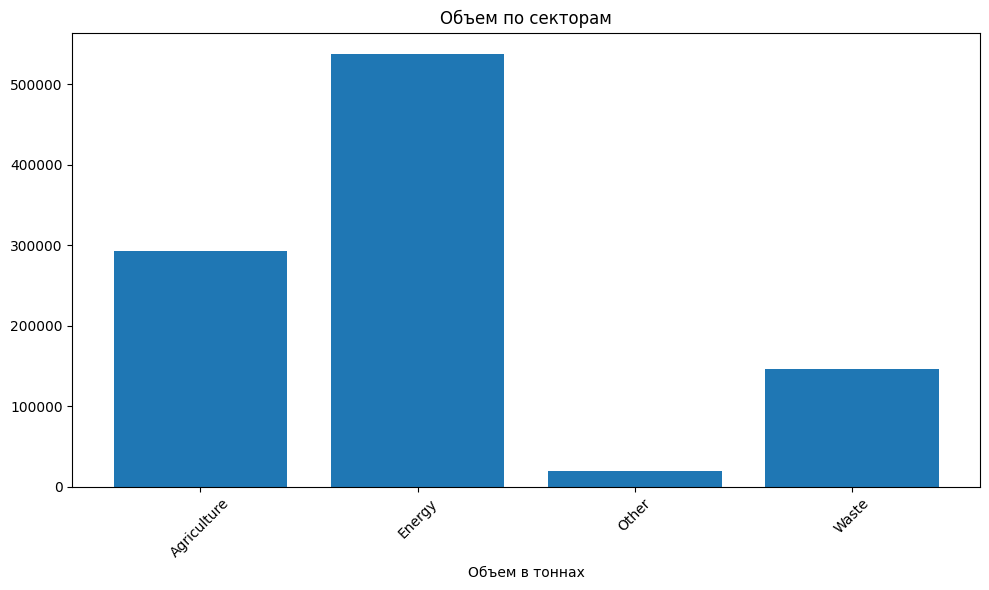

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(grouped_sectors.index,  grouped_sectors.values)
plt.xlabel("Сектор")
plt.xlabel("Объем в тоннах")
plt.title("Объем по секторам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
pivot_table = pd.pivot_table(methane, values="emissions", index="region", aggfunc=["sum", "count"])
pivot_table.columns = ["Объем выбросов", "Количество случаев выбросов"]
pivot_table = pivot_table.sort_values("Объем выбросов", ascending=False)

print("Зависимость объемов выбросов от их частоты")
print(pivot_table)

Зависимость объемов выбросов от их частоты
                           Объем выбросов  Количество случаев выбросов
region                                                                
World                       489152.316956                           22
Asia Pacific                177699.611465                          270
North America                63347.409177                           61
Russia & Caspian             62421.612360                           96
Africa                       54197.152613                          406
Europe                       49208.996818                          302
Central and South America    45639.989799                          183
Middle East                  38095.798763                          187
Other                        15997.357175                           21


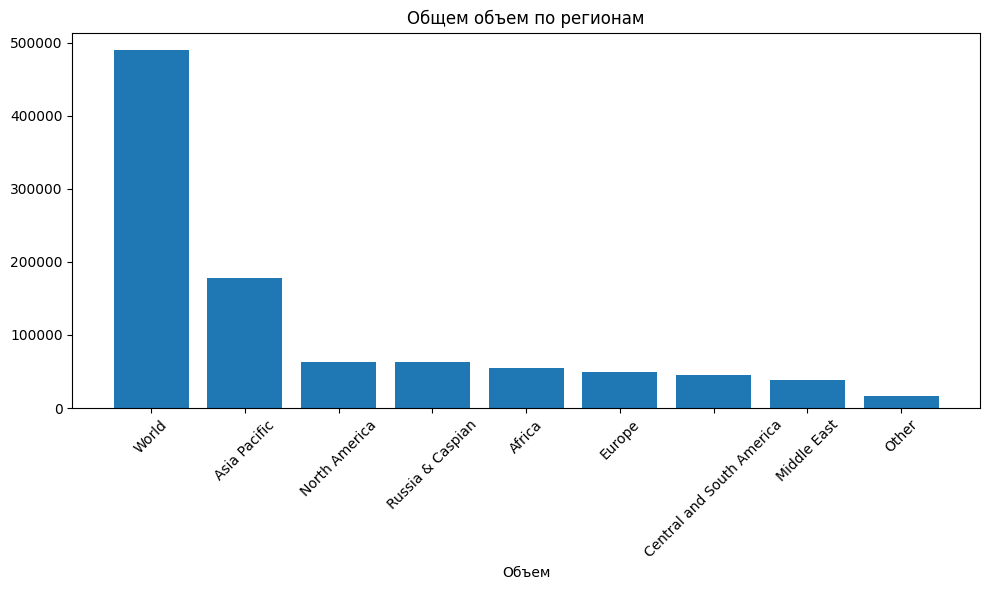

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(pivot_table.index,  pivot_table["Объем выбросов"])
plt.xlabel("Регион")
plt.xlabel("Объем")
plt.title("Общем объем по регионам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

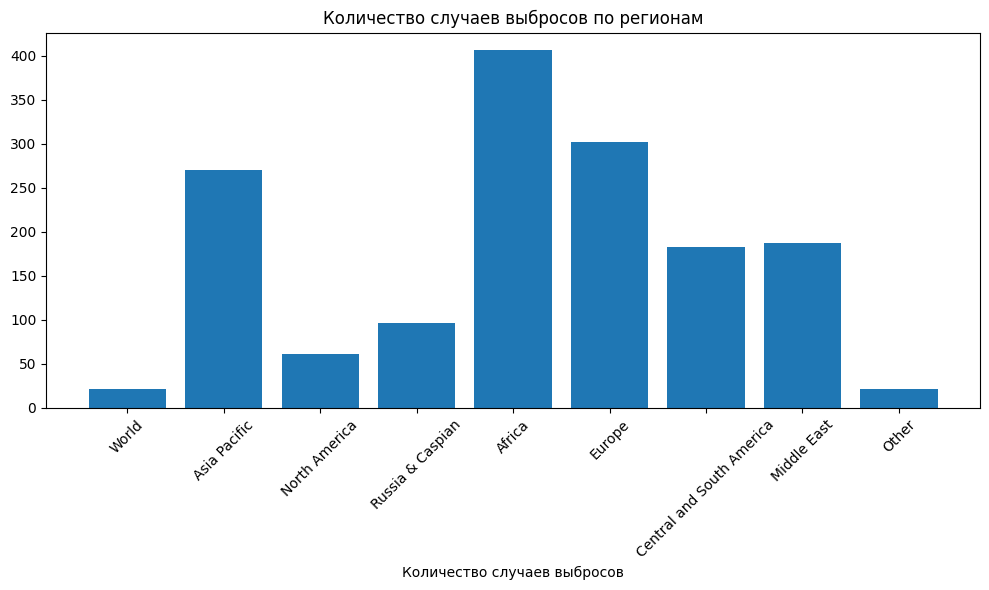

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(pivot_table.index,  pivot_table["Количество случаев выбросов"])
plt.xlabel("Регион")
plt.xlabel("Количество случаев выбросов")
plt.title("Количество случаев выбросов по регионам")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()